In [85]:
# For reading data sets from the web.
import pandas

# For lots of great things.
import numpy as np

# To make our plots.
import matplotlib.pyplot as plt

# Because sympy and LaTeX make
# everything look wonderful!
import sympy as sp
sp.init_printing(use_latex=True)
from IPython.display import display

# Nonlinear PCA method for comparison...
from sklearn.manifold import TSNE

# For another data set
import torchvision



In [86]:
iris_data = np.loadtxt("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt")

In [87]:
iris_data

array([[5.8, 2.7, 3.9, 1.2, 1. ],
       [6.9, 3.1, 5.4, 2.1, 2. ],
       [7.7, 3. , 6.1, 2.3, 2. ],
       [5.7, 3. , 4.2, 1.2, 1. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [5.6, 2.9, 3.6, 1.3, 1. ],
       [6.2, 2.9, 4.3, 1.3, 1. ],
       [5. , 3.2, 1.2, 0.2, 0. ],
       [6.7, 3. , 5. , 1.7, 1. ],
       [6.4, 2.8, 5.6, 2.2, 2. ],
       [6.3, 3.3, 6. , 2.5, 2. ],
       [6.3, 3.4, 5.6, 2.4, 2. ],
       [6.7, 3.1, 4.4, 1.4, 1. ],
       [4.6, 3.2, 1.4, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [6. , 3.4, 4.5, 1.6, 1. ],
       [5.4, 3. , 4.5, 1.5, 1. ],
       [6.3, 2.9, 5.6, 1.8, 2. ],
       [4.4, 3.2, 1.3, 0.2, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [6.4, 3.2, 4.5, 1.5, 1. ],
       [7.7, 2.6, 6.9, 2.3, 2. ],
       [5.8, 2.7, 5.1, 1.9, 2. ],
       [4.9, 3.1, 1.5, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [7.1, 3. , 5.9, 2.1, 2. ],
       [7.9, 3.8, 6.4, 2. , 2. ],
       [5.1, 3.8, 1.6, 0.2, 0. ],
       [5.5, 4.2, 1.4, 0.2, 0. ],
       [5.9, 3

In [88]:
# Remember the data is composed of feature
# vectors AND class labels...
X = iris_data[:,0:4] # 0,1,2,3
Y = iris_data[:,4].astype(int) # 4

# Pretty-print with display()!
display(X.shape)
display(Y.shape)
display(sp.Matrix(np.unique(Y)).T)

In [89]:
# Mean center a vector
def mean_center(x):
    return x - np.mean(x)

# Call this function for each column in the data (move along axis 0 or the rows)
Xcentered = np.apply_along_axis(mean_center,0,X)

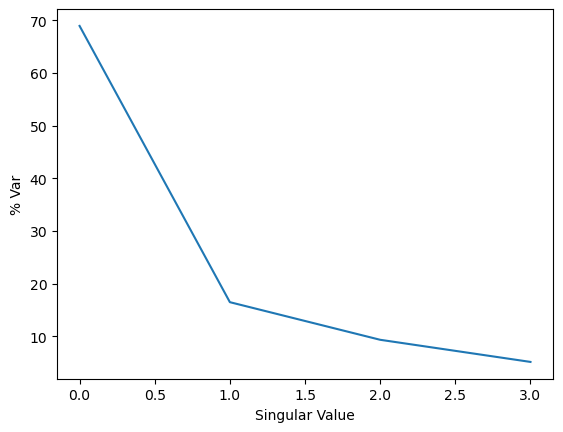

In [90]:
U,S,V = np.linalg.svd(Xcentered,full_matrices=True)

# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [91]:
# Scale the singular vectors, resulting in a rotated form of our mean-centered data
D = np.zeros([X.shape[0],X.shape[1]])
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)

# Extract just the first two principal components!
PCs = Xrotated[:,0:2]
PCs.shape

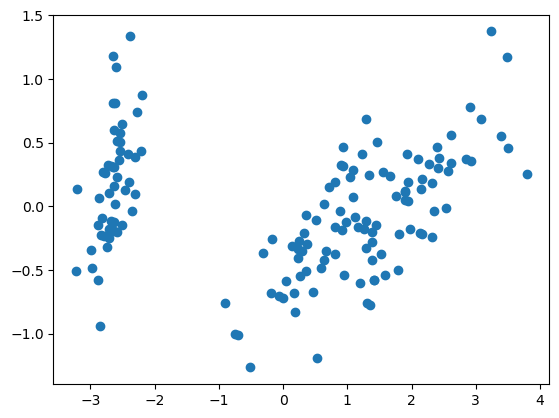

In [92]:
plt.scatter(PCs[:,0],PCs[:,1])
plt.show()

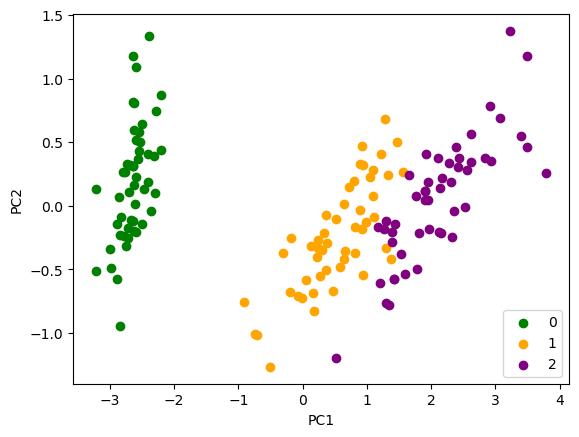

In [93]:
# The x and y values come from the two
# Principal Components and the colors for
# each point are selected based on the
# corresponding class for each point... 
colors = ['green','orange',"purple"]
for i in range(len(colors)):
    plt.scatter(PCs[Y==i,0],
                PCs[Y==i,1],
                color=colors[i])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend([str(x) for x in range(len(colors))])
plt.show()

In [94]:
%%time
NPCs = TSNE(n_components=2).fit_transform(X)

CPU times: user 18.3 s, sys: 27.4 ms, total: 18.3 s
Wall time: 631 ms


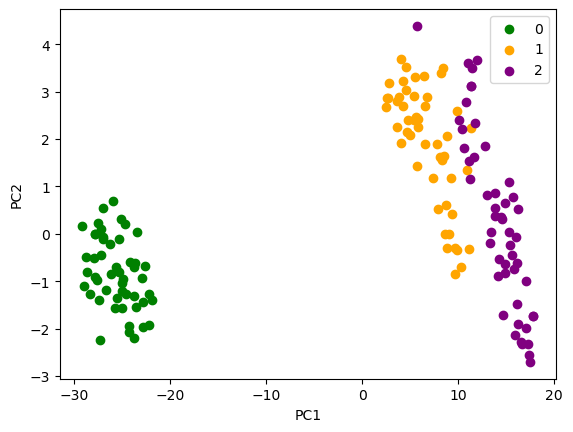

In [96]:
# Need a lot of colors for this one!

colors = ['green','orange',"purple"]
for i in range(len(colors)):
    plt.scatter(NPCs[Y.astype(int)==i,0],
                NPCs[Y.astype(int)==i,1],
                color=colors[i])
#handles, labels = legend_elements(num=10)
#print(handles)
#plt.title(" ".join(["%d - %s"%( for ]))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend([str(x) for x in range(len(colors))])
plt.show()

In [101]:
wdbc_data = np.loadtxt("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/WDBC.txt")

In [102]:
# Remember the data is composed of feature
# vectors AND class labels...
X = wdbc_data[:,:-1] # 0,1,2,3
Y = wdbc_data[:,-1].astype(int) # 4

# Pretty-print with display()!
display(X.shape)
display(Y.shape)
display(sp.Matrix(np.unique(Y)).T)

In [103]:
# Mean center a vector
def mean_center(x):
    return x - np.mean(x)

# Call this function for each column in the data (move along axis 0 or the rows)
Xcentered = np.apply_along_axis(mean_center,0,X)

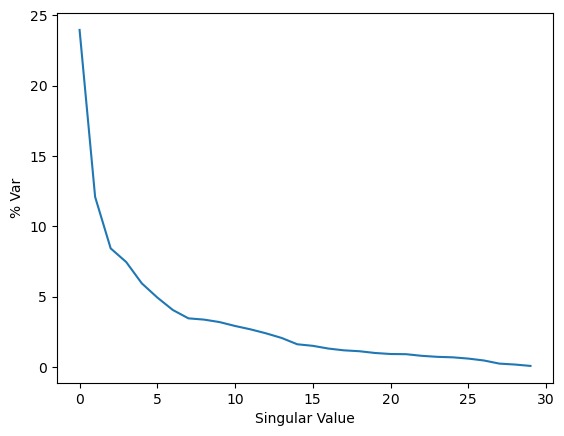

In [104]:
U,S,V = np.linalg.svd(Xcentered,full_matrices=True)

# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [105]:
# Scale the singular vectors, resulting in a rotated form of our mean-centered data
D = np.zeros([X.shape[0],X.shape[1]])
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)

# Extract just the first two principal components!
PCs = Xrotated[:,0:2]
PCs.shape

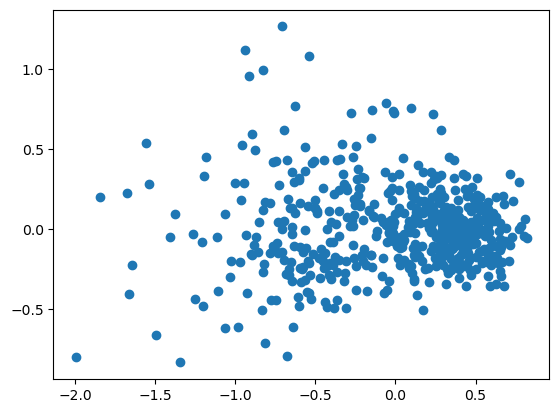

In [106]:
plt.scatter(PCs[:,0],PCs[:,1])
plt.show()

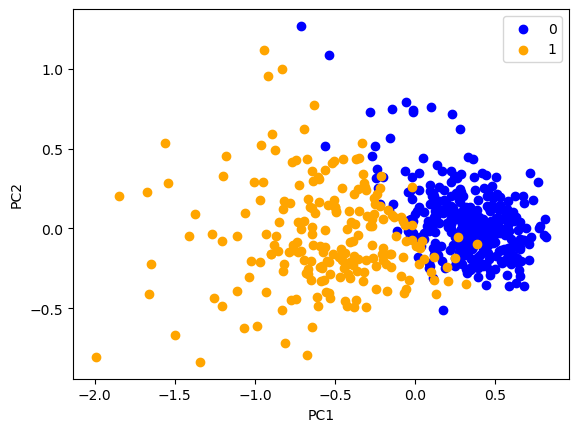

In [107]:
# The x and y values come from the two
# Principal Components and the colors for
# each point are selected based on the
# corresponding class for each point... 
colors = ['blue','orange']
for i in range(len(colors)):
    plt.scatter(PCs[Y==i,0],
                PCs[Y==i,1],
                color=colors[i])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend([str(x) for x in range(len(colors))])
plt.show()

In [108]:
%%time
NPCs = TSNE(n_components=2).fit_transform(X)

CPU times: user 2min 9s, sys: 318 ms, total: 2min 9s
Wall time: 4.4 s


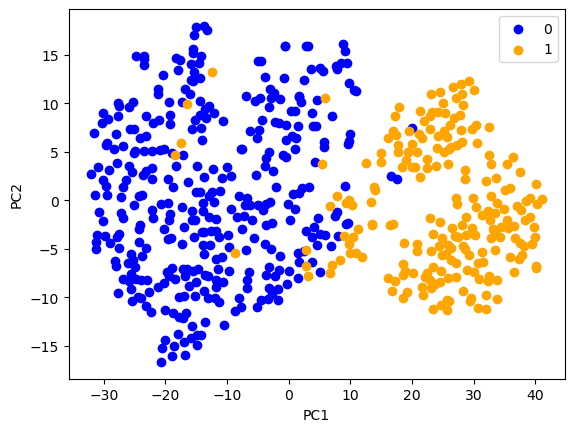

In [109]:
# Need a lot of colors for this one!
colors = ['blue','orange']
for i in range(len(colors)):
    plt.scatter(NPCs[Y.astype(int)==i,0],
                NPCs[Y.astype(int)==i,1],
                color=colors[i])
#handles, labels = legend_elements(num=10)
#print(handles)
#plt.title(" ".join(["%d - %s"%( for ]))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend([str(x) for x in range(len(colors))])
plt.show()

In [110]:
# MNIST
training_dataset = torchvision.datasets.MNIST(root='datasets',download=True, train=True)
testing_dataset = torchvision.datasets.MNIST(root='datasets',download=True, train=False)
x_train = training_dataset.data
# x_train = training_dataset.data.unsqueeze(3).repeat(1,1,1,3)
# x_train = training_dataset.data.unsqueeze(1).repeat(1,3,1,1)
y_train = training_dataset.targets
x_test = testing_dataset.data
# x_test = testing_dataset.data.unsqueeze(3).repeat(1,1,1,3)
# x_test = testing_dataset.data.unsqueeze(1).repeat(1,3,1,1)
y_test = testing_dataset.targets
print(x_train.shape)
print(x_test.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [111]:
# Remember the data is composed of feature
# vectors AND class labels...
X = x_train[::100].detach().numpy().reshape(-1,28*28) # Only keep 600
Y = y_train[::100].detach().numpy().astype(int)

# Pretty-print with display()!
display(X.shape)
display(Y.shape)
display(sp.Matrix(np.unique(Y)).T)

In [112]:
# Mean center a vector
def mean_center(x):
    return x - np.mean(x)

# Call this function for each column in the data (move along axis 0 or the rows)
Xcentered = np.apply_along_axis(mean_center,0,X)

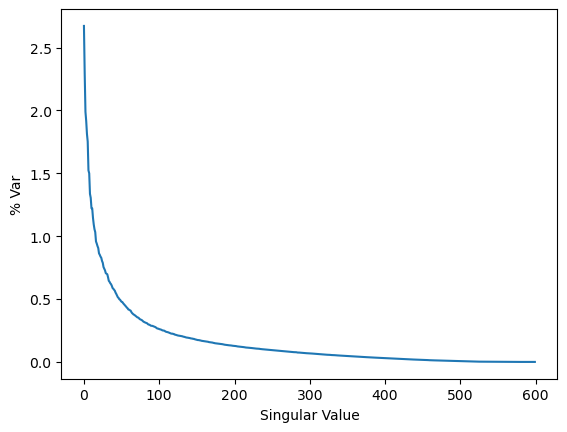

In [113]:
U,S,V = np.linalg.svd(Xcentered,full_matrices=True)

# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [114]:
# Scale the singular vectors, resulting in a rotated form of our mean-centered data
D = np.zeros([X.shape[0],X.shape[1]])
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)

# Extract just the first two principal components!
PCs = Xrotated[:,0:2]
PCs.shape

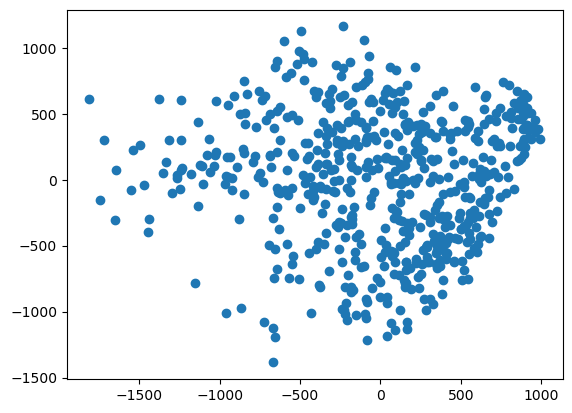

In [115]:
plt.scatter(PCs[:,0],PCs[:,1])
plt.show()

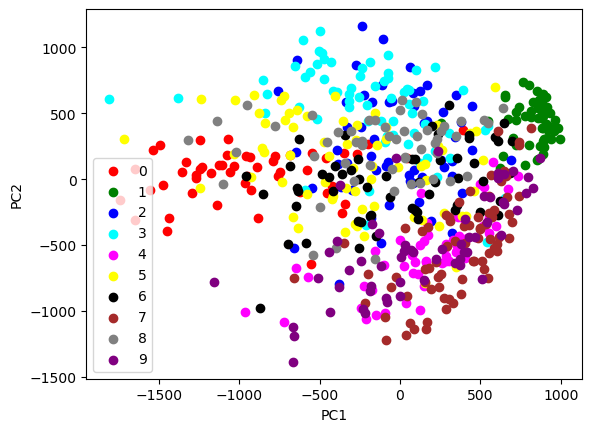

In [116]:
# The x and y values come from the two
# Principal Components and the colors for
# each point are selected based on the
# corresponding iris species for each point... 
colors = ['red','green','blue',
          'cyan','magenta','yellow',
          'black','brown','grey','purple']
for i in range(len(colors)):
    plt.scatter(PCs[Y==i,0],
                PCs[Y==i,1],
                color=colors[i])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend([str(x) for x in range(len(colors))])
plt.show()

In [117]:
%%time
NPCs = TSNE(n_components=2).fit_transform(X)

CPU times: user 1min 30s, sys: 1.87 s, total: 1min 32s
Wall time: 3.14 s


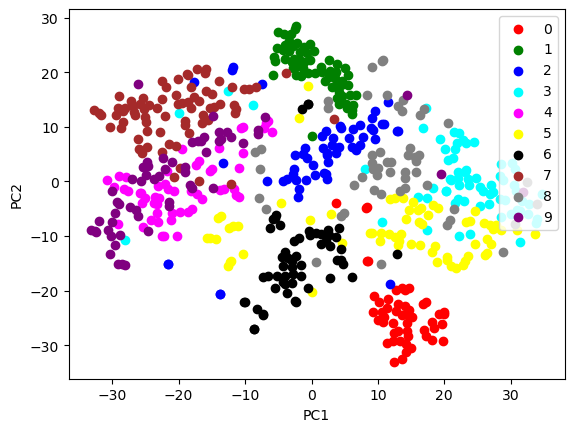

In [118]:
# Need a lot of colors for this one!
colors = ['red','green','blue',
          'cyan','magenta','yellow',
          'black','brown','grey','purple']
for i in range(len(colors)):
    plt.scatter(NPCs[Y.astype(int)==i,0],
                NPCs[Y.astype(int)==i,1],
                color=colors[i])
#handles, labels = legend_elements(num=10)
#print(handles)
#plt.title(" ".join(["%d - %s"%( for ]))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend([str(x) for x in range(len(colors))])
plt.show()